## Assignment 5 optional

I have chosen a dataset of songs, which contains 57650 rows. There are features like an artist, song title and lyrics.
In this notebook I would like to analyse words that appear in songs and try to cluster them, using the k-means algorithm.

In [44]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
import nltk
from wordcloud import WordCloud


In [45]:
songsDf = pd.read_csv("spotify_millsongdata.csv")

In [46]:
songsDf.shape

(57650, 4)

In [47]:
songsDf.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [48]:
songsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


There are no missing values.
I drop the "link" column because I won't use it.

In [49]:
songsDf.drop(["link"], axis = 1, inplace = True)
songsDf

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...
...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...


Like in the previous task, I need to clean the text of any punctuation an unnecessary signs.

In [50]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def cleaning(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text


[nltk_data] Downloading package stopwords to /home/klaud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
songsDf['text'] = songsDf['text'].apply(func = cleaning)

In [52]:
songsDf['text']

0        look face wonderful face means something speci...
1        take easy please touch gently like summer even...
2        never know go put lousy rotten show boy tough ...
3        making somebody happy question give take learn...
4        making somebody happy question give take learn...
                               ...                        
57645    irie days come play let angels fly let devils ...
57646    power workers power power workers need power p...
57647    need something believe flashlights hall call c...
57648    northern star frightened go rest sleep still f...
57649    come make home bit late hate make wait heart s...
Name: text, Length: 57650, dtype: object

Now I have only words in the text column, so I can use CountVectorizer and analyse the count of words in songs.

In [53]:
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000) 
WCmatrix = vectorizer.fit_transform(songsDf.text)#.todense()

I chose the song: "ABBA - As Good As New" and will be checking distances to this song.

In [54]:
some_song = songsDf[songsDf['song'] == 'As Good As New'].index.values[0]
dist = pairwise_distances(WCmatrix, WCmatrix[some_song])

songsDf['euclidean_dist'] = dist
df_tmp = songsDf.sort_values(by=['euclidean_dist'])
neighbours_titles = df_tmp[:10].song
df_tmp[:10]

,artist,song,text,euclidean_dist
2,ABBA,As Good As New,never know go put lousy rotten show boy tough ...,0.000000
31971,Europe,Years,years us seen see good know someone love much ...,18.574176
42366,Luther Vandross,Promise Me,speak things comes love talk whole night love ...,18.894444
25331,Billie Holiday,No Good Man,good man lovin good things never treats good a...,18.894444
28454,Culture Club,Love Is Cold,never good x oh say love wrong cause know love...,19.183326
53279,Tina Turner,Better Be Good To Me,prisoner love entangled web hot whispers night...,19.261360
42210,Louis Armstrong,Tin Roof Blues,yes new orleans woman alright said new orleans...,19.261360
45045,Nazareth,Good Love,black cat look back good luck hang around long...,19.287302
36065,Hollies,Cos You Like To Love Me,feel something right like holding tight wrong ...,19.339080
42156,Louis Armstrong,Got A Bran' New Suit,got bran new suit got bran new tie got bran ne...,19.339080


By euclidean distance, the closest neighbour to "ABBA - As Good As New" song is "Europe - Years". Let's see the lyrics of these songs.

In [55]:
print("ABBA - As Good As New\n", list(songsDf[songsDf['song'] == 'As Good As New'].text)[0])
print("\nEurope - Years\n", list(songsDf[songsDf['song'] == 'Years'].text)[0])

ABBA - As Good As New
 never know go put lousy rotten show boy tough packing stuff saying need anymore enough look standing cause found life gotta near good new love keeping way intention good new growing yes think taking new dimension good new love like used even better good new thank god true darling always meant stay together feel like creep never felt cheap never notion love could deep could make dumb mistake know entitled another break please baby beg forgive cause found life gotta get near thought love end good new love keeping way intention good new growing yes think taking new dimension good new love like used even better good new thank god true darling always meant stay together yes love feels good new darling always meant stay together

Europe - Years
 years us seen see good know someone love much think love fool know maybe good hiding even truth hidden somehow doubt smart could ever still question remains love meant cause feels good true someone love much love true love reso

<table ><tr><th >As Good as New<th><th>Years<th><tr>
<tr><td> 
I'll never know why I had to go 
<br/>Why I had to put up such a lousy rotten show
<br/>Boy, I was tough, packing all my stuff
<br/>Saying I don't need you anymore, I've had enough
<br/>And now, look at me standing here again 'cause I found out that
<br/>Ma ma ma ma ma ma ma ma ma ma ma ma ma ma ma ma my life is here
<br/>Gotta have you near
<br/>As good as new, my love for you
<br/>And keeping it that way is my intention
<br/>As good as new and growing too
<br/>Yes, I think it's taking on a new dimension
<br/>It's as good as new, my love for you
<br/>Just like it used to be and even better
<br/>As good as new, thank God it's true
<br/>Darling, we were always meant to stay together
<br/>Feel like a creep, never felt so cheap
<br/>Never had a notion that my love could be so deep
<br/>How could I make such a dumb mistake
<br/>Now I know I'm not entitled to another break
<br/>But please, baby, I beg you to forgive 'cause I found out that
<br/>Ma ma ma ma ma ma ma ma ma ma ma ma ma ma ma ma my life is here
<br/>Gotta get you near
<br/>I thought that our love was at an end but here I am again
<br/>As good as new, my love for you
<br/>And keeping it that way is my intention
<br/>As good as new and growing too
<br/>Yes, I think it's taking on a new dimension
<br/>It's as good as new, my love for you
<br/>Just like it used to be and even better
<br/>As good as new, thank God it's true
<br/>Darling, we were always meant to stay together
<br/>Yes the love I have for you feels as good as new
<br/>Darling, we were always meant to stay together
<td><td> 
Have you seen me when I didn't see you?  
<br/>Its so good to know that someone can  
<br/>Love me as much as I think you do...  
<br/>Do I love you?  
<br/>Your a fool if you don't know  
<br/>Or maybe I'm so good at hiding  
<br/>Even the truth is hidden from you  
<br/>But somehow I doubt that your  
<br/>As smart as I could ever be  
<br/>But still my question remains  
<br/>Is our love meant to be?  
<br/>Cause it feels too good to be true  
<br/>Can someone love me so much more than I love myself  
<br/>Is this all true?  
<br/>Does love resonate in your heart  
<br/>Like the songs say it does?  
<br/>I can't even begin to believe my dreams  
<br/>When they actually come true...
<td><tr><table>

As we know from the previous task using the Euclidean distances, we unwittingly favour short articles over long ones. And this is seeable in this example song "Years" is much shorter.

Let's see the count of words in these songs to see why they are so similar.

In [56]:
def top_words(song):
    """
    Get a table of the most frequent words 
    """
    vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000) 
    words = vectorizer.fit_transform(songsDf.loc[songsDf.song == song].text).toarray()

    df = pd.DataFrame()
    df[''] = vectorizer.get_feature_names_out()
    df['count'] = words[0]
    df = df.set_index('')

    return df.sort_values(by='count',ascending=False)

There are top words from "As Good As New"

In [57]:
As_Good_As_New_words = top_words("As Good As New")
As_Good_As_New_words[:10]

,count
,
new,11
good,9
love,7
always,3
darling,3
together,3
stay,3
never,3
meant,3


There are top words from "Years"

In [58]:
Years_words = top_words("Years")
Years_words[:10]

,count
,
love,6
true,3
good,3
know,2
even,2
someone,2
much,2
actually,1
seen,1


Now I will combine these dataframes using join operation

In [59]:
As_Good_As_New_words.rename(columns={"count":"count_As_Good_As_New"}, inplace = True)
Years_words.rename(columns={"count":"count_Years"}, inplace = True)

common_words = As_Good_As_New_words.join(Years_words)
common_words = common_words.sort_values(by='count_Years', ascending=False)
common_words.head(10)

,count_As_Good_As_New,count_Years
,,
love,7,6.0
good,9,3.0
true,2,3.0
know,2,2.0
even,2,2.0
meant,3,1.0
like,3,1.0
could,2,1.0
cause,2,1.0


We can see that word "love" appear in both of these songs pretty often. But I think that it is rather a popular word in songs. So let's check if, in the rest of the closest neighbours, it also appears.

In [60]:
print(neighbours_titles)


2                 As Good As New
31971                      Years
42366                 Promise Me
25331                No Good Man
28454               Love Is Cold
53279       Better Be Good To Me
42210             Tin Roof Blues
45045                  Good Love
36065    Cos You Like To Love Me
42156       Got A Bran' New Suit
Name: song, dtype: object


There are 10 nearest neighbours of the song "As Good As New"
For some of them, I'll print 5 top words from them.

In [61]:

for title in neighbours_titles[:3]:
    print(title)
    print(top_words(title)[:5], '\n')


As Good As New
         count
              
new         11
good         9
love         7
always       3
darling      3 

Years
      count
           
love      6
true      3
good      3
know      2
even      2 

Promise Me
         count
              
home         9
promise      6
wait         6
soon         5
feel         3 



/tmp/ipykernel_633/413534742.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for title in neighbours_titles[:3]:


In [62]:
for title in neighbours_titles[3:6]:
    print(title)
    print(top_words(title)[:5], '\n')

No Good Man
        count
             
good        5
love        3
man         3
always      2
born        1 

Love Is Cold
       count
            
love       6
say        3
good       3
never      3
x          3 

Better Be Good To Me
        count
             
good        8
better      4
see         3
cause       2
love        2 



/tmp/ipykernel_633/354372325.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for title in neighbours_titles[3:6]:


We can see that in almost all of them, we have 'love' with a high count number.

Now I will calculate distances using TF IDF and cosine metrics.

In [63]:
vectorizer_tfidf = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None) 

WCmatrix_tfidf= vectorizer_tfidf.fit_transform(songsDf.text)

tfidf=TfidfTransformer(smooth_idf=False, norm=None)
TFIDFmatrix = tfidf.fit_transform(WCmatrix_tfidf)

In [64]:
dist_tfidf_c = cosine_distances(TFIDFmatrix, TFIDFmatrix[songsDf.index[songsDf["song"] == "As Good As New"]])
# add the distances as a column in the wiki dataframe
songsDf['cos-TF-IDF'] = dist_tfidf_c
nearest_neighbors_cosine = songsDf.sort_values(by=['cos-TF-IDF'])
nearest_neighbors_cosine[:10]

,artist,song,text,euclidean_dist,cos-TF-IDF
2,ABBA,As Good As New,never know go put lousy rotten show boy tough ...,0.000000,0.000000
43654,Michael Buble,Feeling Good,birds flying high know feel sun sky know feel ...,24.698178,0.560672
18919,Stevie Wonder,I'm New,try envision oldest living someone every night...,24.392622,0.579100
45850,Nina Simone,Feeling Good,birds flying high know feel sun sky know feel ...,23.130067,0.618852
50387,Reba Mcentire,A New Love,love thing know life cut deeper sharpest knife...,24.124676,0.626563
56291,Whitney Houston,You Give Good Love,found missing always run looking someone like ...,23.874673,0.639047
10751,Kirk Franklin,So Good,verse lift lift hands telling thank telling lo...,36.905284,0.648495
43486,Men At Work,Be Good Johnny,skip de skip road school go bad boy johnny sli...,59.169249,0.664637
4698,Eddie Cochran,New Shoes,new shoes feet new shoes feet dancin baby made...,48.404545,0.664797
40991,Kylie Minogue,Good Life,little girl used dream older wake find good re...,27.092434,0.667347


The closest neighbours from before:

In [65]:
neighbours_titles

2                 As Good As New
31971                      Years
42366                 Promise Me
25331                No Good Man
28454               Love Is Cold
53279       Better Be Good To Me
42210             Tin Roof Blues
45045                  Good Love
36065    Cos You Like To Love Me
42156       Got A Bran' New Suit
Name: song, dtype: object

The closest neighbours have changed. Let's see how "Michael Buble - Feeling Good" is  similar to "ABBA - As Good As New"

In [66]:
Feeling_Good_words=top_words("Feeling Good")[:10]


In [67]:
As_Good_As_New_words = top_words("As Good As New")

As_Good_As_New_words.rename(columns={"count":"count_As_Good_As_New"}, inplace = True)
Feeling_Good_words.rename(columns={"count":"count_Feeling_Good"}, inplace = True)

common_words = As_Good_As_New_words.join(Feeling_Good_words)
common_words = common_words.sort_values(by='count_Feeling_Good', ascending=False)
common_words = common_words.dropna(axis=0)
common_words.head(10)

,count_As_Good_As_New,count_Feeling_Good
,,
new,11,17.0
know,2,12.0
feel,1,10.0
good,9,7.0
life,2,6.0


Now we are looking at different words, chosen by tfidf. And the most frequent word in these songs is "new".

## Clustering
Right now I will try to cluster songs using a k-mean algorithm

**K-means clustering** is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 

In [68]:

tfidf = TfidfVectorizer(stop_words = 'english') 
# english: Stop words are words like “and”, “the”, “him”, 
# which are presumed to be uninformative in representing the content of a text
X_text = tfidf.fit_transform(songsDf['text'])

#### Dimensionality reduction
It is a process that involves using linear algebraic operations to transform n-dimensional data to (n-k)-dimensional data. Some information is lost in this transformation, but we still get a fairly decent approximation with the benefit of being able to visualize the data.

I will use SVD - singular value decomposition

n_components is the desired dimensionality of output data from SVD.


In [69]:
n_components = 10

svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X_text)

I will use the elbow method to determine the number of clusters

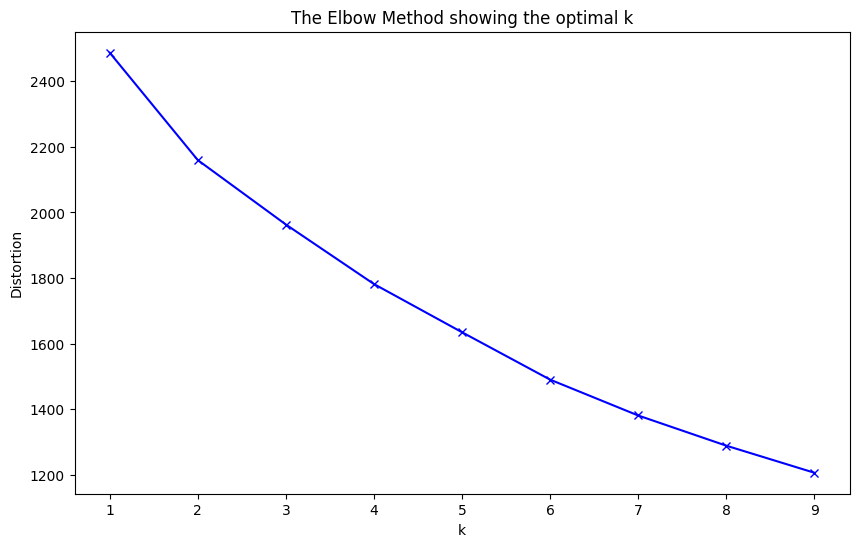

In [70]:
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_2d)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Songs are hard to cluster and we can see that the elbow is not really useful in this case. There is no special point at which this curve stops decreasing significantly. I will choose the number of clusters equal to 6.

n_clusters is the number of clusters to form as well as the number of centroids to generate in K-means



In [71]:
n_clusters = 6

# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)

# predict our clusters for each song
X_clustered = kmeans.fit_predict(X_2d)


# display by groups
df_plot = pd.DataFrame(list(X_2d), list(X_clustered))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

# print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

         Cluster
Cluster         
0          34468
1          13282
2            351
3           2509
4           2527
5           4513


The table shows how many elements contain each cluster

### Visualisation


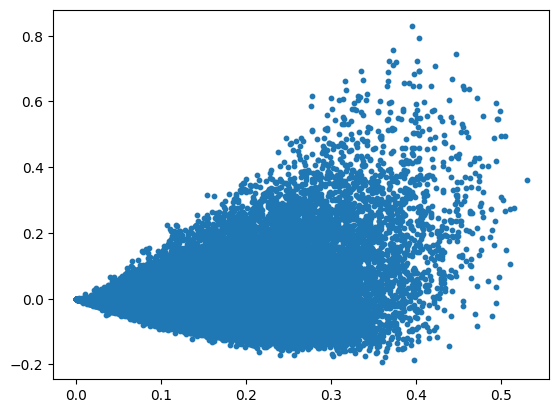

In [72]:
plt.scatter(X_2d[:,0], X_2d[:,1], s=10)

This plot shows the data projected onto 2d space

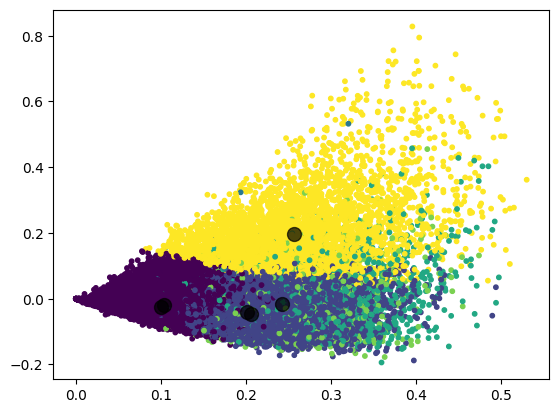

In [73]:
plt.scatter(X_2d[:,0], X_2d[:,1], c=X_clustered, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.7);

Big black dods are centroids of clusters. Each colour represents a different cluster. We can see from this visualisation that this problem is hard to split exactly into specific clusters because they are connected.

In [74]:
songsDf['Cluster'] = df_plot['Cluster']
songsDf

,artist,song,text,euclidean_dist,cos-TF-IDF,Cluster
0,ABBA,Ahe's My Kind Of Girl,look face wonderful face means something speci...,23.748684,0.953453,0
1,ABBA,"Andante, Andante",take easy please touch gently like summer even...,31.352831,0.987678,0
2,ABBA,As Good As New,never know go put lousy rotten show boy tough ...,0.000000,0.000000,5
3,ABBA,Bang,making somebody happy question give take learn...,33.120990,0.962288,0
4,ABBA,Bang-A-Boomerang,making somebody happy question give take learn...,32.449961,0.908926,0
...,...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,irie days come play let angels fly let devils ...,23.194827,0.900676,0
57646,Ziggy Marley,Hand To Mouth,power workers power power workers need power p...,45.332108,0.947338,0
57647,Zwan,Come With Me,need something believe flashlights hall call c...,31.192948,0.908663,0
57648,Zwan,Desire,northern star frightened go rest sleep still f...,27.802878,0.984574,0


Cluster 2 is the smallest cluster so let's see what is in it.

In [75]:
cluster1 = songsDf[songsDf['Cluster'] == 0]
cluster2 = songsDf[songsDf['Cluster'] == 2]

print(cluster2.shape)
cluster2

(351, 6)


,artist,song,text,euclidean_dist,cos-TF-IDF,Cluster
34,ABBA,I Am Just A Girl,girl one among others nothing much say plain s...,24.677925,0.847648,2
63,ABBA,Move On,say restless body hide peaceful soul voyager a...,220.551581,0.994306,2
65,ABBA,My Mama Said,tried sneak without saying loudest record play...,36.027767,0.979807,2
71,ABBA,People Need Love,people need hope people need lovin people need...,113.622181,0.981657,2
105,ABBA,Watch Out,move like flame fire eyes like flash lightning...,39.395431,0.955783,2
...,...,...,...,...,...,...
56359,Who,La La La Lies,lost without friend tell side girl eyes like g...,40.410395,0.990490,2
56396,Who,So Sad About Us,la la la la la la la la la la la la la la la l...,80.131143,0.991403,2
56766,Wu-Tang Clan,Jah World,speaketh tongues hearts flesh yeah stanyoi who...,30.413813,0.973994,2
57239,Yes,The Gates Of Delirium,la la la la la la la la la la la la la la la l...,33.286634,0.990349,2


I calculate tf idf distance from the song from cluster 2: "I Am Just A Girl"

In [76]:
dist_tfidf_c = cosine_distances(TFIDFmatrix, TFIDFmatrix[songsDf.index[songsDf["song"] == "I Am Just A Girl"]])
# add the distances as a column in the wiki dataframe
songsDf['cos-TF-IDF-v2'] = dist_tfidf_c
nearest_neighbors_cosine = songsDf.sort_values(by=['cos-TF-IDF-v2'])
nearest_neighbors_cosine[:10]

,artist,song,text,euclidean_dist,cos-TF-IDF,Cluster,cos-TF-IDF-v2
34,ABBA,I Am Just A Girl,girl one among others nothing much say plain s...,24.677925,0.847648,2,0.000000
31573,Engelbert Humperdinck,My Summer Song,anything girl anything say look sky blue girl ...,31.701735,0.988744,2,0.573298
44380,The Monkees,The Kind Of Girl I Could Love,girl look mighty good know got kind girl could...,21.118712,0.881433,5,0.577625
52857,The Temptations,Girl (Why You Wanna Make Me Blue),love girl heart soul understand treat cold eve...,40.062451,0.973382,1,0.583832
17670,Rihanna,Only Girl,la la la la la la la la la la la la verse want...,43.301270,0.940809,2,0.590042
5603,Everclear,Brown Eyed Girl,hear song makes think girl used know sing alon...,74.833148,0.985212,2,0.593446
48191,Pharrell Williams,I Really Like You,flashing lights met typical place would flash ...,56.780278,0.978106,1,0.595720
44002,Miley Cyrus,Closet Full Of Clothes,hey girl take makeup know wanna look beautiful...,37.134889,0.982889,2,0.596687
24253,Ariel Rivera,Jealous,jealous girl caught eye one darker days looked...,30.773365,0.969581,2,0.598929
53213,Tim McGraw,Lookin' For That Girl,girl party nighter little funky cold medina li...,59.707621,0.982561,3,0.599122


Here I check if distances from this song are different between clusters.
Firstly, I checked the average distance from all songs from cluster 2 to this song.
Secondly, I checked this distance but with songs from cluster 0.

In [77]:
TFIDF_values_for_cluster2 = []
for song_from_cl2 in list(cluster2.index):
    value = ((nearest_neighbors_cosine.iloc[[song_from_cl2]]["cos-TF-IDF-v2"].item()))
    # title = (nearest_neighbors_cosine.song.iloc[[song_from_cl2]].item())
    TFIDF_values_for_cluster2.append(value)

print("cluster 2 avarage distance to song \"I Am Just A Girl\" (from the same cluster): ",np.average(TFIDF_values_for_cluster2))

TFIDF_values_for_cluster1 = []
for song_from_cl1 in list(cluster1.index):
    value = ((nearest_neighbors_cosine.iloc[[song_from_cl1]]["cos-TF-IDF-v2"].item()))
    TFIDF_values_for_cluster1.append(value)
    
print("cluster 0 avarage distance to song \"I Am Just A Girl\" (from 2 cluster): ",np.average(TFIDF_values_for_cluster1))

cluster 2 avarage distance to song "I Am Just A Girl" (from the same cluster):  0.9548327189098369
cluster 0 avarage distance to song "I Am Just A Girl" (from 2 cluster):  0.9607148070136408


I thought that there will be a bigger difference, but average it's just slightly bigger for different cluster

Here I prepared a function to find the most significant words for each cluster, using the TFIDF vectorizer.

In [79]:
songsDf['Cluster'] = df_plot['Cluster']

def generate_text(cluster):
    df_s = songsDf[songsDf['Cluster'] == cluster]['text']
    count = len(df_s)

    tfidf = TfidfVectorizer(stop_words = 'english')
    X_trans = tfidf.fit_transform(df_s)
    idf = tfidf.idf_

    df_result = pd.DataFrame(data = [tfidf.get_feature_names_out(), list(idf)])
    df_result = df_result.T
    df_result.columns = ['words', 'score']
    df_result = df_result.sort_values(['score'], ascending=False)
    df_result = df_result[:20]
    d = df_result.set_index('words')['score'].to_dict()
    return d

And visualise it by word clouds

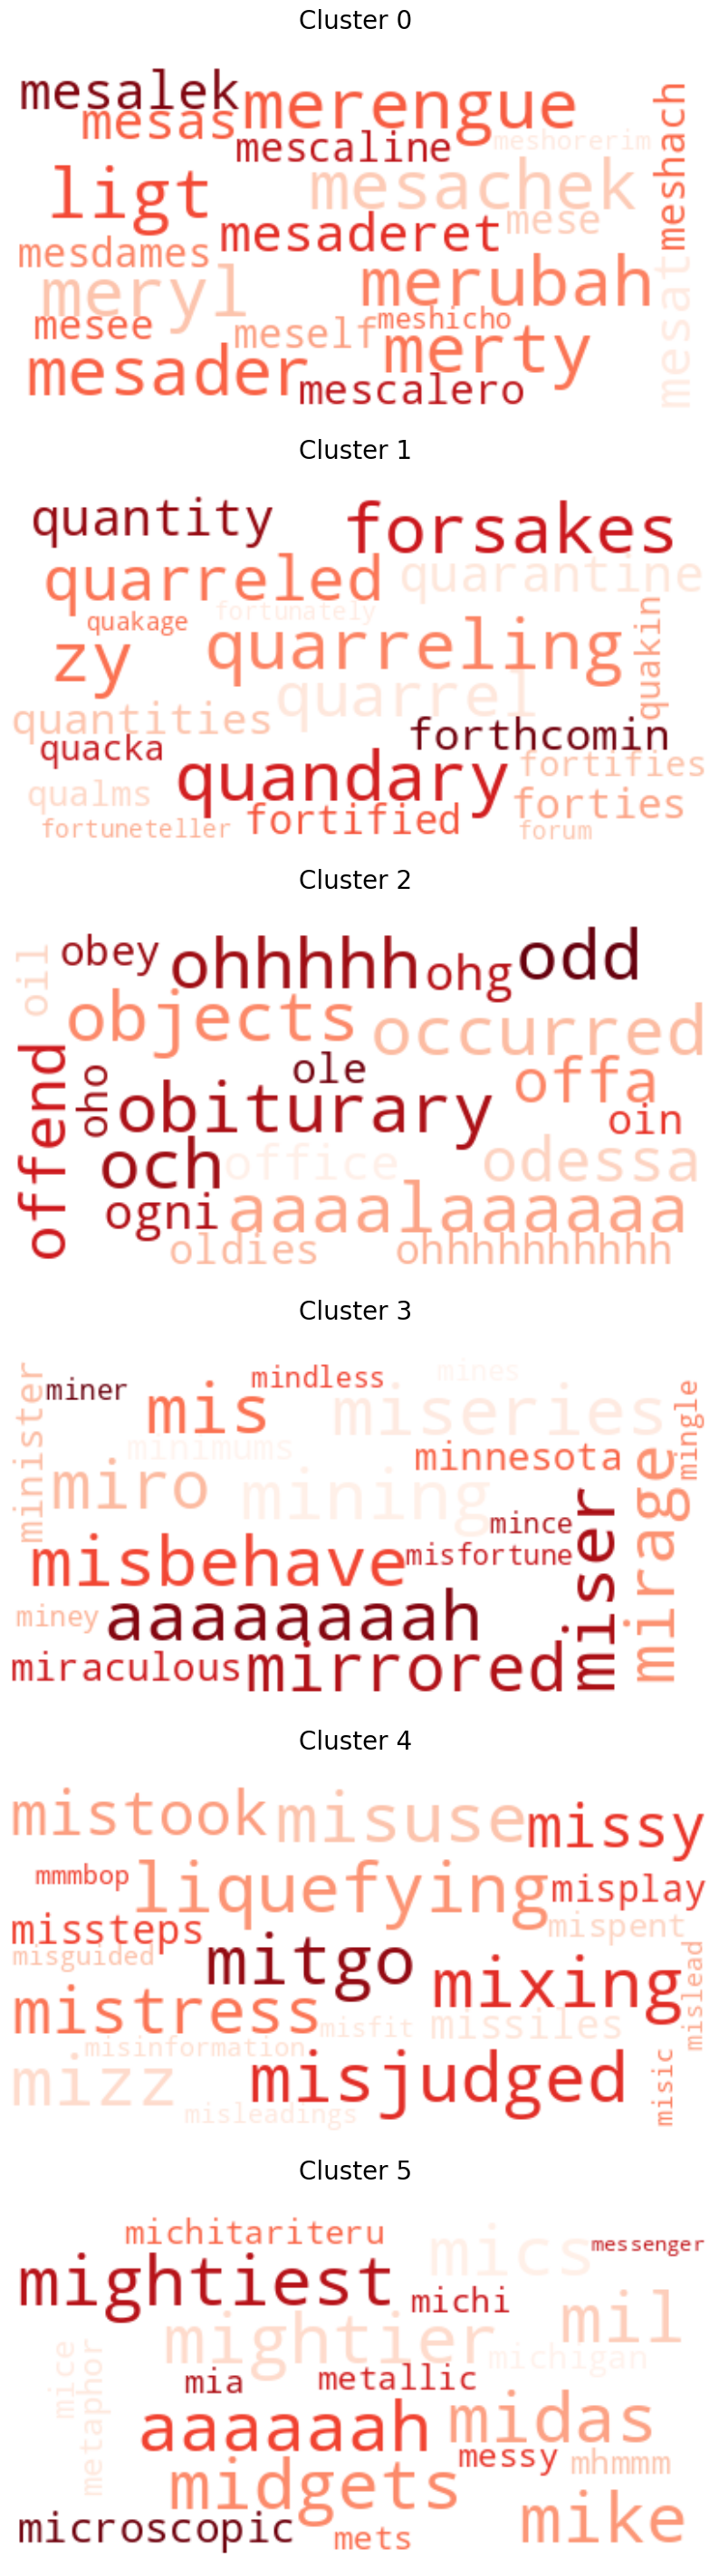

In [80]:

fig, ax = plt.subplots(n_clusters, sharex=True, figsize=(10,6*n_clusters))

for i in range(0, n_clusters):
    d = generate_text(i)
    wordcloud = WordCloud(max_font_size=40, collocations=False, colormap = 'Reds', background_color = 'white').fit_words(d)
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].set_title('Cluster {} \n'.format(i), fontsize = 20)
    ax[i].axis("off")

To conclude It's hard to cluster songs by lyrics. We can see in these word clouds the most popular words, but looking at this I don't especially can conclude what type of song it is.